In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report



In [5]:
#IMproting the data
data = pd.read_csv(r'ParisHousingClass.csv')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [6]:
#Checking the datatypes and getting some general information about it 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [7]:
#Checking for any null values , we have none in this case
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [9]:
data['category'].unique()

array(['Basic', 'Luxury'], dtype=object)

In [10]:
#We transform the category values into numeric values so that all our data values are numeric 

data['category'].replace("Basic", 0 , inplace = True)
data['category'].replace("Luxury", 1 , inplace = True)

In [12]:
#As you can see all the values are numeric type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [13]:
#We also check for duplicate values, and in our case we have none
data.duplicated().sum()


0

<AxesSubplot:>

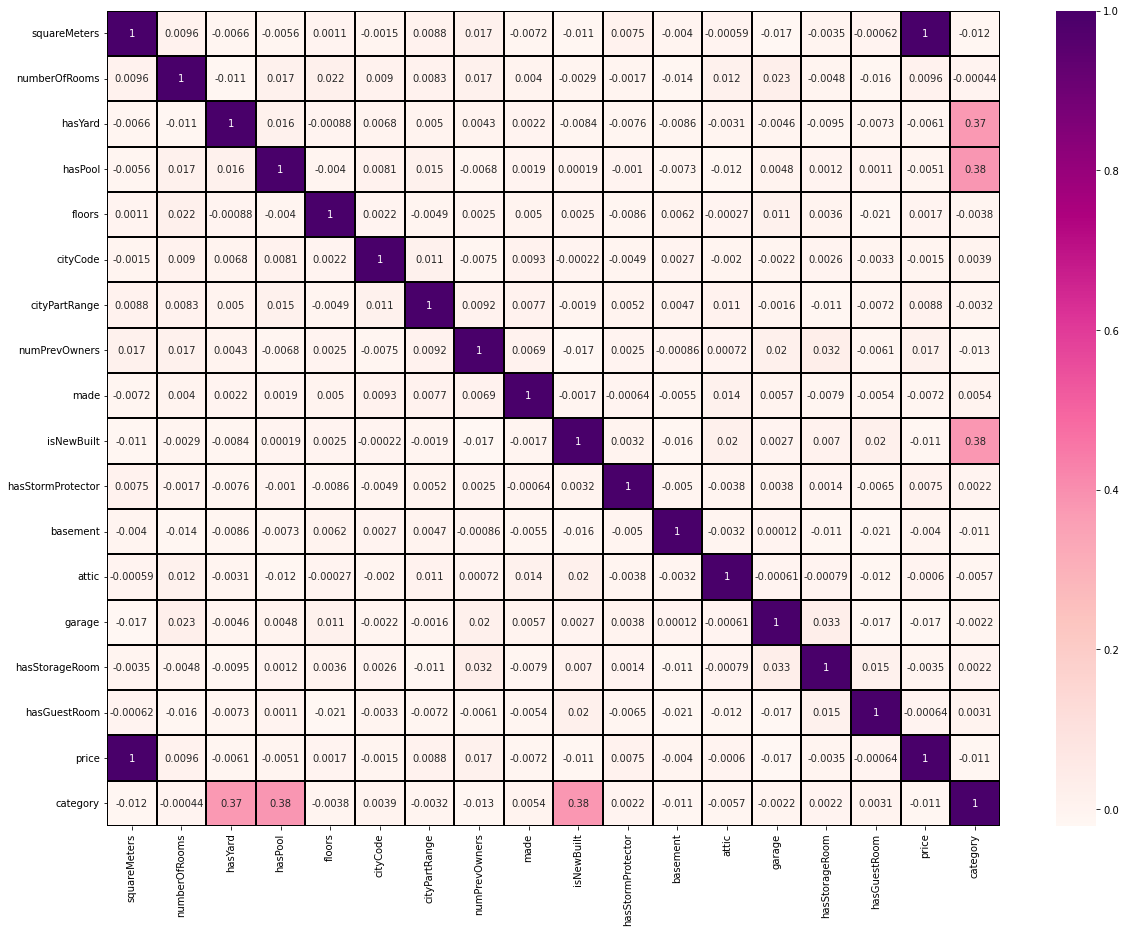

In [16]:
#To get mote insight into the data, we create the heatmap of our data to see the correlation matrix of the values.
#In this case we see that there is high correlation between the category and hasYard, hasPool, isNewBuilt values
#another thing we notice is that squareMeters is 100% correlated with price
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')

<AxesSubplot:ylabel='category'>

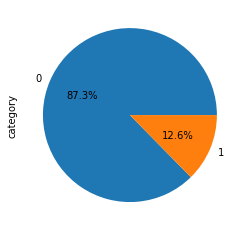

In [18]:
#To visualize the distribution of our two categories we create a pie chart (0-Basic, 1-Luxury)
round(data['category'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

In [19]:
#To get more insight into the data here we can see that all luxerious apartments have yars, but 
#not all the apartments with yards are necessarily luxarious

pd.crosstab(data['category'], data['hasYard'], margins=True).style.background_gradient(cmap="Blues")

hasYard,0,1,All
category,,,
0,4913,3822,8735
1,0,1265,1265
All,4913,5087,10000


In [21]:
#We notice the same logic here, all the luxarious apartments have pools, but not all aprtments with 
#pools are luxarious
pd.crosstab(data['category'], data['hasPool'], margins=True).style.background_gradient(cmap="Blues")

hasPool,0,1,All
category,,,
0,5032,3703,8735
1,0,1265,1265
All,5032,4968,10000


In [22]:
#Again same logic here, all the luxarious apartments are newBuilt, but not all newBuilt apartments
#are luxarious
pd.crosstab(data['category'], data['isNewBuilt'], margins=True).style.background_gradient(cmap="Blues")

isNewBuilt,0,1,All
category,,,
0,5009,3726,8735
1,0,1265,1265
All,5009,4991,10000


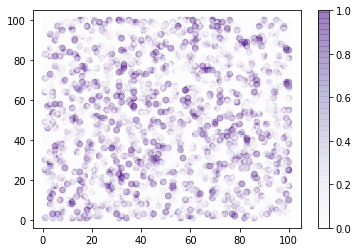

In [26]:
#This scatter plot helps to visualize that Luxurious apartments are distributed almost evenly
plt.scatter(data = data , x="numberOfRooms" , y="floors" , c =data["category"], cmap = 'Purples', alpha = 0.3)
plt.colorbar ()
plt.show()

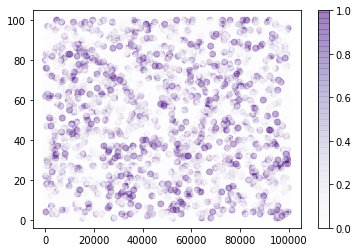

In [27]:
#we notice the same even distribution even for squareMeters and numberOfRooms variables
plt.scatter(data = data , x="squareMeters" , y="numberOfRooms" , c =data["category"], cmap = 'Purples', alpha = 0.3)
plt.colorbar ()
plt.show()

In [28]:
#Since in our correlation matrix we saw that price and squareMeters are 100% correlated, we have to drop one of them
#before doing any tests. We decided to drop the price since we assumed that people who buy luxarious houses would
#care more about the sqare meters of the apatment than the price
data2 = data.drop(["price"], axis = 1)


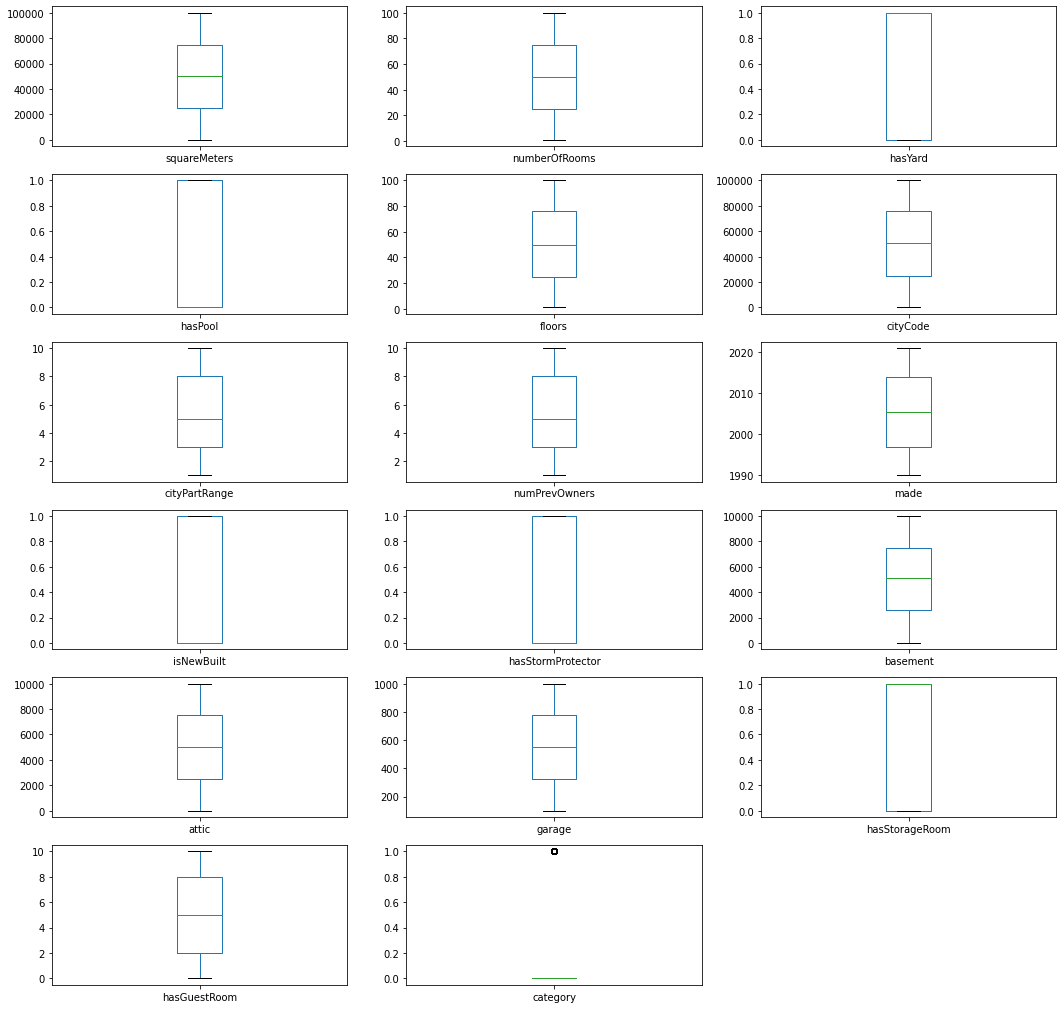

In [31]:
#Here we are checking for the outliers and we can see there are none except for the category, which makes sense 
#since luxarious apartments are the minority
data2.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()

Since in our case luxarious category is the minority, we will create a dataset that contains equal number of luxarious
and basic apartments to make our classification model non-biased


In [40]:

x_lux = data2[data2['category']==1]
print(x_lux.shape)
x_basic = data2[data2['category']==0].sample(1265)
print(x_basic.shape)

X_equal = [x_basic,x_lux]
balanced_result = pd.concat(X_equal)
balanced_result

(1265, 17)
(1265, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
2196,93217,54,0,0,95,4907,1,5,1997,0,1,4686,7993,696,0,9,0
4800,8497,97,1,0,57,99577,9,2,2018,1,0,4113,1101,250,0,7,0
3074,23682,31,1,0,97,61955,3,10,2007,1,1,4705,9969,115,0,4,0
8473,44854,18,1,0,79,88270,2,7,1997,1,1,5217,4224,385,0,2,0
5575,57850,32,0,0,93,32412,7,10,1993,0,0,7085,3863,141,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,89549,60,1,1,95,1965,2,4,2006,1,0,5919,2553,543,1,6,1
9947,98554,81,1,1,18,85908,9,10,2007,1,1,744,5486,399,0,8,1
9973,14982,64,1,1,13,96468,7,5,2002,1,0,1073,7110,720,1,10,1
9986,26907,65,1,1,43,3916,8,3,2003,1,0,1276,9010,248,0,4,1


We divide the data into x and y, tha category labels will be our y which we will need to predict and so 
we need to drop the category column from our x

In [41]:
X = balanced_result.drop('category',axis=1)
y = balanced_result['category']

Standardizing our data and splitting it into traning and testing data (30% testing, 70% training)

In [44]:
scaler = StandardScaler()
std_df = scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)


We are using the Random Forest Classifier and we get very high accuracy score, which might be because of overfitting. 

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)

1.0

TO check whether it was caused by overfitting we should run confusion matrix. By the results we can see that everything was correctly predicted. 377: Predicted to be Basic, and they really are basic. 0 : Predicted to be luxurious, but they are basic and etc. 

In [48]:
confusion_matrix(Y_test, Y_pred)


array([[377,   0],
       [  0, 382]])

The test score shows that indeed we get 100% accuracy. 

In [49]:
rf.score(X_test,Y_test)

1.0

In [50]:
categories = ['Basic','Luxurious']
print(classification_report(Y_test, Y_pred, target_names=categories))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       377
   Luxurious       1.00      1.00      1.00       382

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759

